In [1]:
import pandas as pd
import torch 

df = pd.read_csv('creditcard_2023.csv')
print(df)

            id        V1        V2        V3        V4        V5        V6  \
0            0 -0.260648 -0.469648  2.496266 -0.083724  0.129681  0.732898   
1            1  0.985100 -0.356045  0.558056 -0.429654  0.277140  0.428605   
2            2 -0.260272 -0.949385  1.728538 -0.457986  0.074062  1.419481   
3            3 -0.152152 -0.508959  1.746840 -1.090178  0.249486  1.143312   
4            4 -0.206820 -0.165280  1.527053 -0.448293  0.106125  0.530549   
...        ...       ...       ...       ...       ...       ...       ...   
568625  568625 -0.833437  0.061886 -0.899794  0.904227 -1.002401  0.481454   
568626  568626 -0.670459 -0.202896 -0.068129 -0.267328 -0.133660  0.237148   
568627  568627 -0.311997 -0.004095  0.137526 -0.035893 -0.042291  0.121098   
568628  568628  0.636871 -0.516970 -0.300889 -0.144480  0.131042 -0.294148   
568629  568629 -0.795144  0.433236 -0.649140  0.374732 -0.244976 -0.603493   

              V7        V8        V9  ...       V21       V22  

In [2]:
df.shape

(568630, 31)

In [3]:
class_count = df['Class'].value_counts()
class_count

Class
0    284315
1    284315
Name: count, dtype: int64

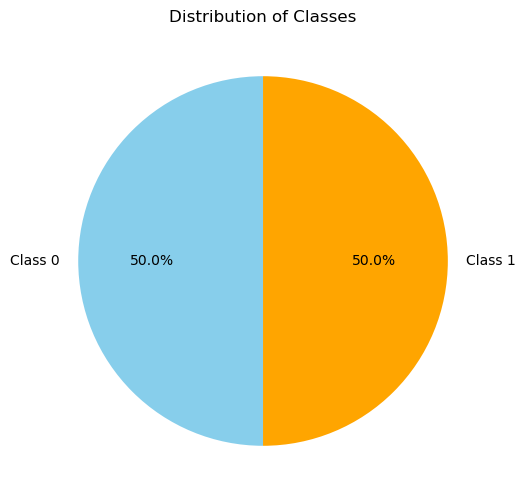

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6, 6))
plt.pie(
    class_count, 
    labels=['Class 0', 'Class 1'], 
    autopct='%1.1f%%', 
    startangle=90, 
    colors=['skyblue', 'orange']
)
plt.title('Distribution of Classes')
plt.show()
df.head()

In [5]:
# Creating mulitList and initilizing y
multiList = []
y = []
for _, row in df.iterrows():
    temp = []
    for col in df.columns:
        if col == 'id':
            continue
        elif col == 'Class':
            y.append(row[col])
            continue
        temp.append(row[col])
    multiList.append(temp)
X = torch.tensor(multiList)
y = torch.tensor(y)

In [6]:
X, y
X = X.to(torch.float32)
y = y.to(torch.float32)

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, # 20% test, 80% train
                                                    random_state=42) # make the random split reproducible

len(X_train), len(X_test), len(y_train), len(y_test)



# Check the new shapeprint("New Shape of Labels Tensor (Y):", Y_tensor.shape)

(454904, 113726, 454904, 113726)

In [8]:
from torch import nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(in_features = 29, out_features = 80)
        self.layer_2 = nn.Linear(in_features = 80, out_features = 80)
        self.layer_3 = nn.Linear(in_features = 80, out_features = 1)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(p=0.5)  # Adding dropout to prevent overfitting
    def forward(self, X):
        Y = self.layer_1(X)
        Y = self.relu(Y)
        Y = self.dropout(Y) 
        Y = self.layer_2(Y)
        Y = self.relu(Y)
        Y = self.layer_3(Y)
        return Y
model = Model()

In [9]:
# Create loss and optimizer

loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=0.1)


In [10]:
# Calculate accuracy
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [11]:
from sklearn.preprocessing import StandardScaler
# Training 
torch.manual_seed(42)
epochs = 100

# data is normalized
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_tensor = torch.tensor(X_train_scaled, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_scaled, dtype=torch.float32)

for epoch in range(epochs):
    model.train()
    y_logits = model(X_train_tensor).squeeze()
    y_pred = torch.round(torch.sigmoid(y_logits))
    loss = loss_fn(y_logits, y_train)
    acc = accuracy_fn(y_train, y_pred)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    # Testing
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test_tensor).squeeze()
        test_pred = torch.round(torch.sigmoid(test_logits))

        test_loss = loss_fn(test_logits, y_test)
        test_acc = accuracy_fn(y_test, test_pred)

        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | Loss: {loss:.5f}, Accuracy: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Accuracy: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.70962, Accuracy: 42.13% | Test Loss: 0.29704, Test Accuracy: 88.87%
Epoch: 10 | Loss: 0.22871, Accuracy: 93.56% | Test Loss: 0.26285, Test Accuracy: 94.03%
Epoch: 20 | Loss: 0.24314, Accuracy: 92.79% | Test Loss: 0.24627, Test Accuracy: 93.09%
Epoch: 30 | Loss: 0.18132, Accuracy: 94.73% | Test Loss: 0.15502, Test Accuracy: 95.71%
Epoch: 40 | Loss: 0.13072, Accuracy: 95.14% | Test Loss: 0.10943, Test Accuracy: 95.79%
Epoch: 50 | Loss: 0.11057, Accuracy: 95.57% | Test Loss: 0.09006, Test Accuracy: 96.11%
Epoch: 60 | Loss: 0.09638, Accuracy: 96.03% | Test Loss: 0.07641, Test Accuracy: 96.51%
Epoch: 70 | Loss: 0.08711, Accuracy: 96.45% | Test Loss: 0.06631, Test Accuracy: 97.16%
Epoch: 80 | Loss: 0.07577, Accuracy: 97.03% | Test Loss: 0.05574, Test Accuracy: 97.80%
Epoch: 90 | Loss: 0.07286, Accuracy: 97.05% | Test Loss: 0.05371, Test Accuracy: 97.86%


python(9213) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


Confusion Matrix:
[[55932   818]
 [ 1156 55820]]


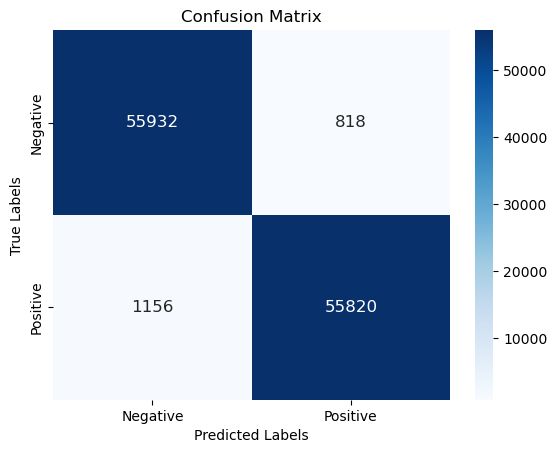

In [12]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

y_preds = torch.round(torch.sigmoid(model(X_test_tensor).squeeze()))

# Convert PyTorch  to tensor
y_preds_numpy = y_preds.detach().numpy()
y_test_numpy = y_test.numpy()

# Compute confusion matrix
cm = confusion_matrix(y_test_numpy, y_preds_numpy)

# Print confusion matrix
print("Confusion Matrix:")
print(cm)

# Visualize confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt="g", cmap="Blues", annot_kws={"size": 12}, xticklabels=["Negative", "Positive"], yticklabels=["Negative", "Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test_numpy, y_preds_numpy))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98     56750
         1.0       0.99      0.98      0.98     56976

    accuracy                           0.98    113726
   macro avg       0.98      0.98      0.98    113726
weighted avg       0.98      0.98      0.98    113726

